<a href="https://colab.research.google.com/github/YuslenLopez/hello-world/blob/main/Assignment12_CNN_CAP4613_LopezYuslen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yuslen Lopez \\
CAP4613 \\
Z# 23673549 \\
Google Colab Link: https://colab.research.google.com/drive/1Wr5wOD7_2TES-w1F5vHXaVuqX_vhhZsf?usp=sharing

In [1]:
#For making readable PDF
!jupyter nbconvert --to html /Assignment12_CNN_CAP4613_LopezYuslen.ipynb

[NbConvertApp] Converting notebook /Assignment12_CNN_CAP4613_LopezYuslen.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 812070 bytes to /Assignment12_CNN_CAP4613_LopezYuslen.html


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
samples of training images


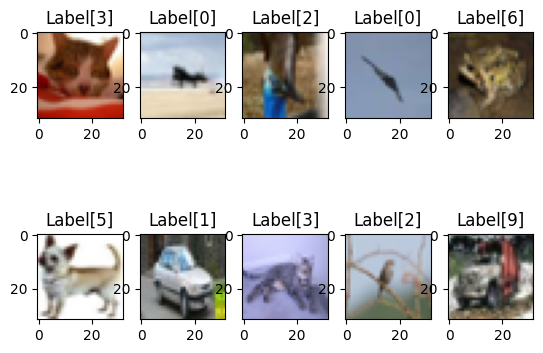

In [2]:
from typing import Sequence
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from random import randint

#support functions --------------------------------
def img_plt(images, labels):
  plt.figure() #figsize=(15,8)
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:])
    plt.title("Label" + str(labels[i-1]))
  plt.show()


def feat_plot(features,labels,classes):
  for class_i in classes:
    plt.plot(features[labels[:]==classes[class_i],0],features[labels[:]==classes[class_i],1],'o',markersize=15)
  #plt.axis([-2,2,-2,2])
  plt.xlabel('X:Feature 1')
  plt.ylabel('Y:Feature 2')
  plt.legend(["Class"+ str(classes[class_i])for class_i in classes])
  plt.show()

def acc_fun(labels_actual,labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc
#support functions end --------------------------------

#a.
#importing data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes=np.arange(10)
print(x_train.shape)

#Splitting some of training set to validation set
#shuffle training data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:,:]
y_train=y_train[train_ind_s]
#selecting 20% of training images for validation
x_val=x_train[0:int(num_train_img*0.2),:,:,:]
y_val=y_train[0:int(num_train_img*0.2)]
#the rest of the training set
x_train=x_train[int(num_train_img*0.2):,:,:,:]
y_train=y_train[int(num_train_img*0.2):]

print("samples of training images")
img_plt(x_train[0:10,:,:,:],y_train[0:10])
# print("samples of validation images")
# img_plt(x_val[0:10,:,:,:],y_val[0:10


#b.
#scaling  the images
x_train=x_train.astype('float32')/255
x_val=x_val.astype('float32')/255
x_test=x_test.astype('float32')/255

#c.
#convert class vectors to binary class metrics (used for softmax at the end)
y_train_c=to_categorical(y_train,len(classes))
y_val_c=to_categorical(y_val,len(classes))
y_test_c=to_categorical(y_test, len(classes))




Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3402 - loss: 1.7751

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3406 - loss: 1.7740 - val_accuracy: 0.5783 - val_loss: 1.1475
Epoch 2/50
1240/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6094 - loss: 1.1024

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6096 - loss: 1.1020 - val_accuracy: 0.6541 - val_loss: 0.9565
Epoch 3/50
1240/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6877 - loss: 0.8852

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6877 - loss: 0.8850 - val_accuracy: 0.6749 - val_loss: 0.9327
Epoch 4/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.7465

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7361 - loss: 0.7465 - val_accuracy: 0.7201 - val_loss: 0.8110
Epoch 5/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7776 - loss: 0.6427

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7776 - loss: 0.6428 - val_accuracy: 0.7357 - val_loss: 0.8010
Epoch 6/50
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8065 - loss: 0.5501

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8065 - loss: 0.5503 - val_accuracy: 0.7343 - val_loss: 0.8006
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8329 - loss: 0.4735 - val_accuracy: 0.7286 - val_loss: 0.8113
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8541 - loss: 0.4082 - val_accuracy: 0.7453 - val_loss: 0.8271
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8774 - loss: 0.3468 - val_accuracy: 0.7293 - val_loss: 0.9135
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8913 - loss: 0.3093 - val_accuracy: 0.7384 - val_loss: 0.9783
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9005 - loss: 0.2768 - val_accuracy: 0.7455 - val_loss: 0.9538
Epoch 12/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9140 - loss: 0.2448 - val_accuracy: 0.7271 - val_loss: 1.0633
Epoch 13/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9215 - loss: 0.2221 - v

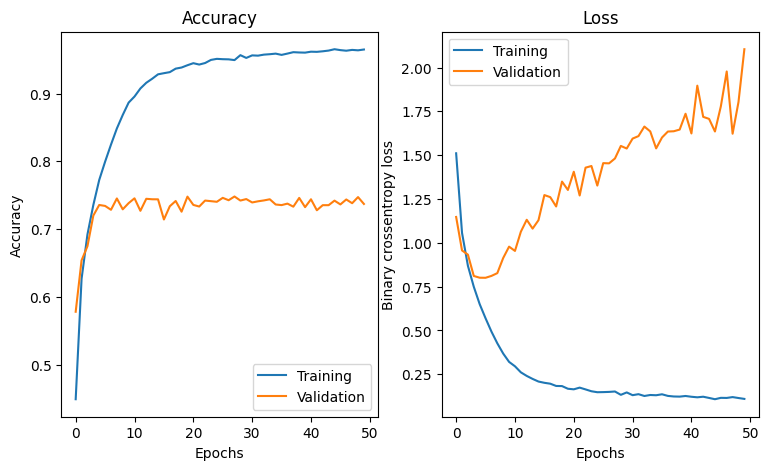

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8794 - loss: 0.3676
Total loss on training set: 0.37082821130752563
Training accuracy: 0.8779500126838684
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7332 - loss: 0.7909
Total loss on validation set: 0.8006082773208618
Validation accuracy: 0.7343000173568726


In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def plot_curve(accuracy_train,loss_train,accuracy_val,loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train, epochs, accuracy_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training','Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train, epochs, loss_val)
  plt.xlabel('Epochs')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Loss')
  plt.legend(['Training','Validation'])
  plt.show()



#d.
#defining model
model_a=Sequential()
model_a.add(Conv2D(32,(3,3), padding='same',
                   input_shape=x_train.shape[1:]))#activity_regularizer =12(0.0001)
model_a.add(Activation('relu'))
model_a.add(Conv2D(32,(3,3),  padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))

model_a.add(Conv2D(64,(3,3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64,(3,3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))

model_a.add(Flatten())
model_a.add(Dense(units=512,activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=len(classes),activation='softmax'))
model_a.summary()





#e.
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#creating a checkpoint to save the best model based on the lowest validation loss
save_path='/content/drive/My Drive/model_a_fashion_mnist.h5'
callbacks_save=ModelCheckpoint(save_path,monitor='val_loss',verbose=0,save_best_only=True,save_freq='epoch')

history = model_a.fit(x_train, y_train_c,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_val, y_val_c),
                    callbacks=[callbacks_save])
plt.figure(figsize=(9,5))
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)

#loading the best model - saved based on the lowest validation loss
model_a=load_model(save_path)

#evaluating the model on the training samples
score=model_a.evaluate(x_train,y_train_c)
print('Total loss on training set:', score[0])
print('Training accuracy:', score[1])

#evaluating the model on the validation samples
score=model_a.evaluate(x_val,y_val_c)
print('Total loss on validation set:', score[0])
print('Validation accuracy:', score[1])











Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3135 - loss: 1.8400

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.3138 - loss: 1.8394 - val_accuracy: 0.5477 - val_loss: 1.2836
Epoch 2/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5380 - loss: 1.2793

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.5380 - loss: 1.2792 - val_accuracy: 0.6084 - val_loss: 1.1021
Epoch 3/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6070 - loss: 1.1040

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6070 - loss: 1.1039 - val_accuracy: 0.6507 - val_loss: 0.9704
Epoch 4/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6474 - loss: 0.9984

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6474 - loss: 0.9983 - val_accuracy: 0.6953 - val_loss: 0.8609
Epoch 5/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6754 - loss: 0.9213

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6754 - loss: 0.9213 - val_accuracy: 0.7147 - val_loss: 0.8234
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6861 - loss: 0.8865

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6861 - loss: 0.8865 - val_accuracy: 0.7194 - val_loss: 0.8064
Epoch 7/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7054 - loss: 0.8402

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7054 - loss: 0.8402 - val_accuracy: 0.7438 - val_loss: 0.7206
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7096 - loss: 0.8288 - val_accuracy: 0.7442 - val_loss: 0.7234
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7202 - loss: 0.7976 - val_accuracy: 0.7422 - val_loss: 0.7569
Epoch 10/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7340 - loss: 0.7633

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7340 - loss: 0.7633 - val_accuracy: 0.7569 - val_loss: 0.7009
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7280 - loss: 0.7742 - val_accuracy: 0.7580 - val_loss: 0.7099
Epoch 12/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.7402 - loss: 0.7517 - val_accuracy: 0.7561 - val_loss: 0.7045
Epoch 13/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7466 - loss: 0.7252 - val_accuracy: 0.7375 - val_loss: 0.7736
Epoch 14/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7502 - loss: 0.7110

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7502 - loss: 0.7110 - val_accuracy: 0.7704 - val_loss: 0.6647
Epoch 15/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7560 - loss: 0.6975 - val_accuracy: 0.7708 - val_loss: 0.6963
Epoch 16/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7561 - loss: 0.7026 - val_accuracy: 0.7584 - val_loss: 0.7069
Epoch 17/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7611 - loss: 0.6816

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.7611 - loss: 0.6816 - val_accuracy: 0.7891 - val_loss: 0.6176
Epoch 18/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.7649 - loss: 0.6772 - val_accuracy: 0.7855 - val_loss: 0.6320
Epoch 19/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7670 - loss: 0.6674 - val_accuracy: 0.7588 - val_loss: 0.7157
Epoch 20/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.7680 - loss: 0.6598 - val_accuracy: 0.7698 - val_loss: 0.6858
Epoch 21/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7728 - loss: 0.6496 - val_accuracy: 0.7779 - val_loss: 0.6589
Epoch 22/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7735 - loss: 0.6573 - val_accuracy: 0.7801 - val_loss: 0.6511
Epoch 23/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7748 - loss: 0.6463 - val_accuracy: 0.7796 - val_loss: 0.6640
Epoch 24/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7805 - los

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7839 - loss: 0.6271 - val_accuracy: 0.7968 - val_loss: 0.6155
Epoch 28/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7847 - loss: 0.6244 - val_accuracy: 0.7930 - val_loss: 0.6167
Epoch 29/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7882 - loss: 0.6067 - val_accuracy: 0.7897 - val_loss: 0.6432
Epoch 30/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7890 - loss: 0.6149 - val_accuracy: 0.7948 - val_loss: 0.6390
Epoch 31/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.7935 - loss: 0.5930 - val_accuracy: 0.7876 - val_loss: 0.6666
Epoch 32/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7910 - loss: 0.5979 - val_accuracy: 0.7898 - val_loss: 0.6408
Epoch 33/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7964 - loss: 0.5950 - val_accuracy: 0.7915 - val_loss: 0.6342
Epoch 34/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7946 - loss

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7946 - loss: 0.5889 - val_accuracy: 0.8050 - val_loss: 0.5852
Epoch 35/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7931 - loss: 0.5890 - val_accuracy: 0.7985 - val_loss: 0.6159
Epoch 36/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7963 - loss: 0.5835 - val_accuracy: 0.7923 - val_loss: 0.6319
Epoch 37/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7955 - loss: 0.5882 - val_accuracy: 0.8044 - val_loss: 0.6000
Epoch 38/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8011 - loss: 0.5795

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8011 - loss: 0.5795 - val_accuracy: 0.8047 - val_loss: 0.5762
Epoch 39/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7970 - loss: 0.5814 - val_accuracy: 0.7902 - val_loss: 0.6516
Epoch 40/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7956 - loss: 0.5839 - val_accuracy: 0.7994 - val_loss: 0.6248
Epoch 41/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7970 - loss: 0.5873 - val_accuracy: 0.8040 - val_loss: 0.6062
Epoch 42/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.8006 - loss: 0.5762 - val_accuracy: 0.7931 - val_loss: 0.6193
Epoch 43/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7980 - loss: 0.5831

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7980 - loss: 0.5831 - val_accuracy: 0.8075 - val_loss: 0.5632
Epoch 44/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.8027 - loss: 0.5674 - val_accuracy: 0.8098 - val_loss: 0.5724
Epoch 45/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.8101 - loss: 0.5587 - val_accuracy: 0.7971 - val_loss: 0.6315
Epoch 46/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8039 - loss: 0.5612

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8039 - loss: 0.5612 - val_accuracy: 0.8148 - val_loss: 0.5615
Epoch 47/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.8059 - loss: 0.5634 - val_accuracy: 0.8050 - val_loss: 0.6014
Epoch 48/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8057 - loss: 0.5648 - val_accuracy: 0.8034 - val_loss: 0.6099
Epoch 49/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.8029 - loss: 0.5720 - val_accuracy: 0.8030 - val_loss: 0.6002
Epoch 50/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8044 - loss: 0.5673 - val_accuracy: 0.7947 - val_loss: 0.6276


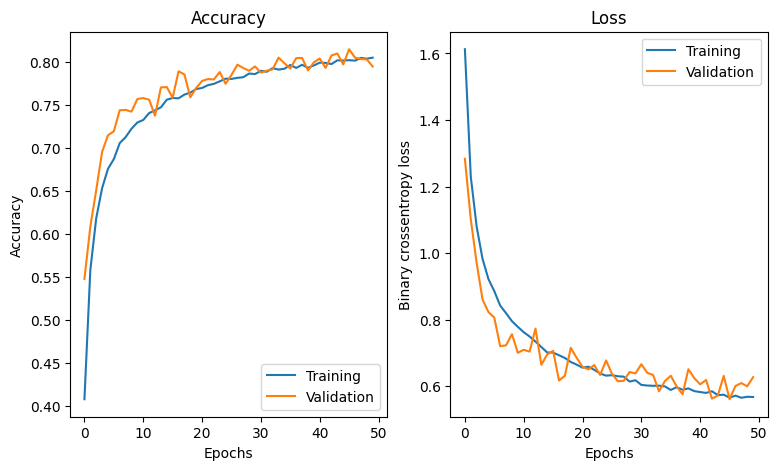

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8780 - loss: 0.3531
Total loss on training set: 0.3565908968448639
Training accuracy: 0.8754000067710876
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8148 - loss: 0.5456
Total loss on validation set: 0.5614543557167053
Validation accuracy: 0.8148000240325928


In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def plot_curve(accuracy_train,loss_train,accuracy_val,loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train, epochs, accuracy_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training','Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train, epochs, loss_val)
  plt.xlabel('Epochs')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Loss')
  plt.legend(['Training','Validation'])
  plt.show()



#f.(CNN using data real-time augmentation)

#defining model
model_a=Sequential()
model_a.add(Conv2D(32,(3,3), padding='same',
                   input_shape=x_train.shape[1:]))#activity_regularizer =12(0.0001)
model_a.add(Activation('relu'))
model_a.add(Conv2D(32,(3,3),  padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))

model_a.add(Conv2D(64,(3,3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64,(3,3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))

model_a.add(Flatten())
model_a.add(Dense(units=512,activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=len(classes),activation='softmax'))
model_a.summary()


opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


#creating image data generator for real-time data augmentation
datagen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

#Compute quantities required for featurewise normalization
#(std, mean and principal components if ZCA whitening is applied)
datagen.fit(x_train)

#creating a checkpoint to save the best model based on the lowest validation loss
save_path='/content/drive/My Drive/model_a_fashion_mnist.h5'
callbacks_save=ModelCheckpoint(save_path,monitor='val_loss',verbose=0,save_best_only=True,save_freq='epoch')

history = model_a.fit(datagen.flow(x_train, y_train_c,
                    batch_size=32),
                    steps_per_epoch=len(x_train) // 32,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_val, y_val_c),
                    callbacks=[callbacks_save])

plt.figure(figsize=(9,5))
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)

#loading the best model - saved based on the lowest validation loss
model_a=load_model(save_path)

#evaluating the model on the training samples
score=model_a.evaluate(x_train,y_train_c)
print('Total loss on training set:', score[0])
print('Training accuracy:', score[1])

#evaluating the model on the validation samples
score=model_a.evaluate(x_val,y_val_c)
print('Total loss on validation set:', score[0])
print('Validation accuracy:', score[1])










g. What do you observe from the validation loss in both step (e) and (f)? Is the model overfitting or underfitting the training data?  Explain.

-The validation loss in step (e) is much greater than the loss in step (f). This is due to overfitting of the training set in step (e). To decrease overfitting of the data in step (f) we added more variations to the training data by augmenting the data with certain operations. This resulted in a much better and tighter fit of the validation data to the training data.

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_53 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_54 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,026 (8.28 MB)

 Trainable params: 2,169,598 (8.28 MB)

 Non-trainable params: 1,428 (5.58 KB)

Epoch 1/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4573 - loss: 1.5315

625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4580 - loss: 1.5296 - val_accuracy: 0.5210 - val_loss: 1.4085
Epoch 2/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6723 - loss: 0.9363

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6723 - loss: 0.9362 - val_accuracy: 0.6563 - val_loss: 0.9742
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7203 - loss: 0.7948 - val_accuracy: 0.6651 - val_loss: 0.9803
Epoch 4/50
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7667 - loss: 0.6738

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7667 - loss: 0.6739 - val_accuracy: 0.7260 - val_loss: 0.7856
Epoch 5/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7943 - loss: 0.5995

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7943 - loss: 0.5995 - val_accuracy: 0.7446 - val_loss: 0.7505
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8155 - loss: 0.5272 - val_accuracy: 0.6454 - val_loss: 1.0850
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8319 - loss: 0.4790 - val_accuracy: 0.7246 - val_loss: 0.8249
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8533 - loss: 0.4133 - val_accuracy: 0.7543 - val_loss: 0.7677
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8723 - loss: 0.3720 - val_accuracy: 0.6141 - val_loss: 1.5673
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8792 - loss: 0.3433 - val_accuracy: 0.7295 - val_loss: 0.8869
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8930 - loss: 0.3067 - val_accuracy: 0.7446 - val_loss: 0.8146
Epoch 12/50
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9024 - loss: 0.2823

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9024 - loss: 0.2823 - val_accuracy: 0.7677 - val_loss: 0.7171
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9172 - loss: 0.2372 - val_accuracy: 0.7367 - val_loss: 0.9362
Epoch 14/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9172 - loss: 0.2388 - val_accuracy: 0.7546 - val_loss: 0.8432
Epoch 15/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9326 - loss: 0.1931 - val_accuracy: 0.7759 - val_loss: 0.7651
Epoch 16/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9377 - loss: 0.1742 - val_accuracy: 0.7795 - val_loss: 0.7724
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9433 - loss: 0.1649 - val_accuracy: 0.7395 - val_loss: 0.9917
Epoch 18/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9441 - loss: 0.1631 - val_accuracy: 0.7803 - val_loss: 0.8249
Epoch 19/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9452 - loss: 0.1602 - val_accuracy: 0.7484

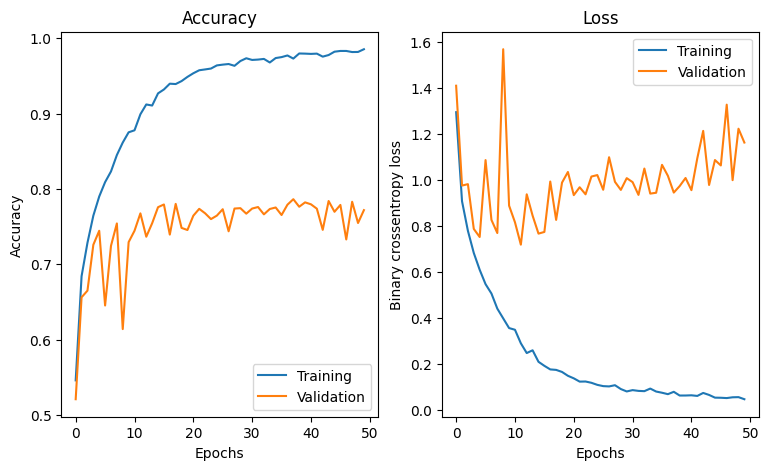

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9420 - loss: 0.1918
Total loss on training set: 0.19643159210681915
Training accuracy: 0.9397000074386597
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7646 - loss: 0.7165
Total loss on validation set: 0.7170640826225281
Validation accuracy: 0.7677000164985657


In [29]:
#(Batch Normalization)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

from keras.layers import BatchNormalization

def plot_curve(accuracy_train,loss_train,accuracy_val,loss_val):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train, epochs, accuracy_val)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training','Validation'])

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train, epochs, loss_val)
  plt.xlabel('Epochs')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Loss')
  plt.legend(['Training','Validation'])
  plt.show()



#h. (CNN with batch normalization layers)

#defining model
model_a=Sequential()
model_a.add(Conv2D(32,(3,3), padding='same',
                   input_shape=x_train.shape[1:], use_bias=False))#activity_regularizer =12(0.0001)
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(32,(3,3),  padding='same', use_bias=False))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))

model_a.add(Conv2D(64,(3,3), padding='same', use_bias=False))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(64,(3,3), padding='same', use_bias=False))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2)))

model_a.add(Flatten())
model_a.add(Dense(units=512,activation='relu'))
model_a.add(BatchNormalization())
model_a.add(Dropout(0.5))
model_a.add(Dense(units=len(classes)))
model_a.add(BatchNormalization())
model_a.add(Activation('softmax'))
model_a.summary()





#e.
opt = tf.keras.optimizers.Adam(learning_rate=0.01) #is higher because batch normalization allows for this
model_a.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#creating a checkpoint to save the best model based on the lowest validation loss
save_path='/content/drive/My Drive/model_a_fashion_mnist.h5'
callbacks_save=ModelCheckpoint(save_path,monitor='val_loss',verbose=0,save_best_only=True,save_freq='epoch')

history = model_a.fit(x_train, y_train_c,
                    batch_size=64,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_val, y_val_c),
                    callbacks=[callbacks_save])
plt.figure(figsize=(9,5))
acc_curve_train=np.array(history.history['accuracy'])
loss_curve_train=np.array(history.history['loss'])
acc_curve_val=np.array(history.history['val_accuracy'])
loss_curve_val=np.array(history.history['val_loss'])
plot_curve(acc_curve_train,loss_curve_train,acc_curve_val,loss_curve_val)

#loading the best model - saved based on the lowest validation loss
model_a=load_model(save_path)

#evaluating the model on the training samples
score=model_a.evaluate(x_train,y_train_c)
print('Total loss on training set:', score[0])
print('Training accuracy:', score[1])

#evaluating the model on the validation samples
score=model_a.evaluate(x_val,y_val_c)
print('Total loss on validation set:', score[0])
print('Validation accuracy:', score[1])











i.What do you observe from the training loss in both steps (e) and (h)? Explain.

-The training loss of (e) and (h) dont differ too drastically. However this is with the increase learning rate and batch size of (h) which would normally cause an increase in the loss. The main take aways are that in (h) the starting validation loss is much lower and the rate at which the validation loss increases has been slown down drastically to near plateau. Also a minor increase in the training accuracy. Over all providing minor benefits and more flexability with the learning rate.